# Credit Card Default Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Importing the dataset and checking for null values

In [2]:
df=pd.read_excel('TaiwanCreditDefaults.xls', header=1)

In [3]:
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
len(df.columns)

25

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

# Exploratory Data Analysis

### 1: Default Payment Next Month

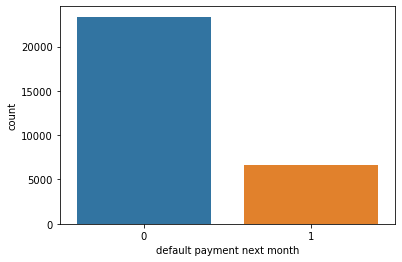

In [8]:
sns.countplot(df['default payment next month'])

### 2: Sex Distribution

Text(0.5, 0, '1: Male. 2: Female')

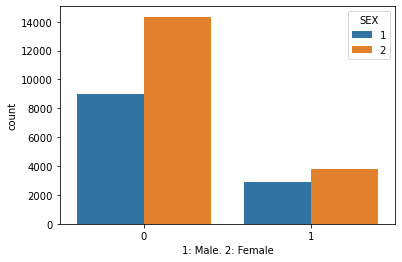

In [9]:
sns.countplot(df['default payment next month'], hue=df['SEX'])
plt.xlabel('1: Male. 2: Female')

### 3: Marriage Distributions

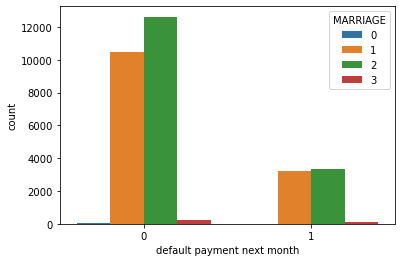

In [10]:
sns.countplot(df['default payment next month'],hue=df['MARRIAGE'])
#plt.xlabel('')

### 4:  AGE VS LIMIT_BAL

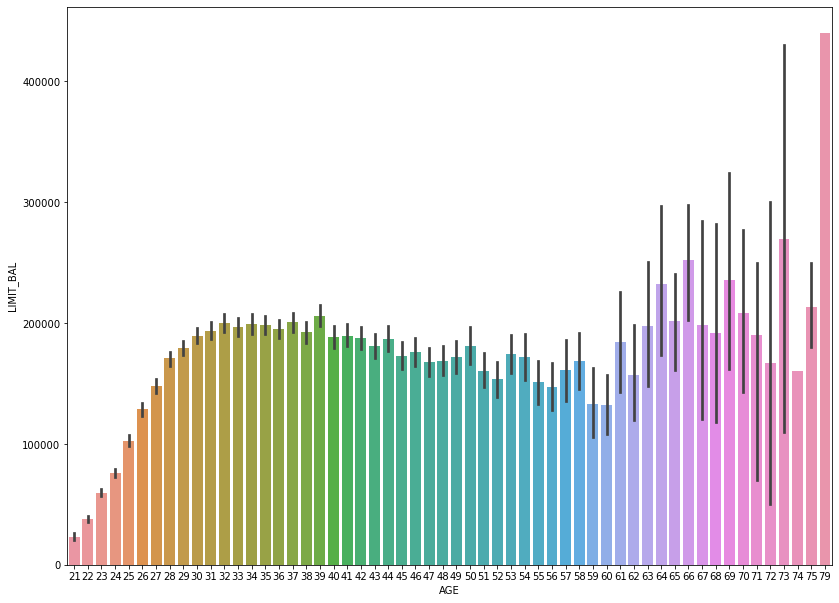

In [11]:
fig, ax=plt.subplots()
fig.set_size_inches(13.7,10.27) #A4 sheet size
sns.barplot(df['AGE'],df['LIMIT_BAL'])

### 5: Distribution Plot

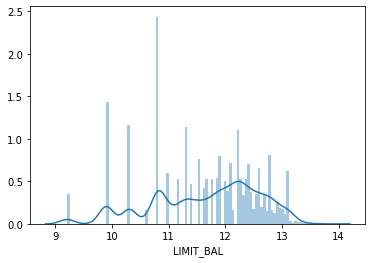

In [12]:
sns.distplot(np.log(df['LIMIT_BAL']),bins=100)

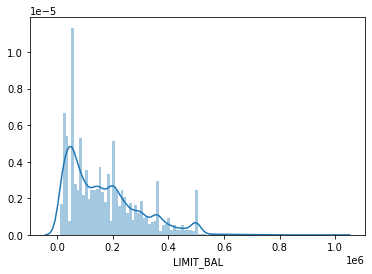

In [13]:
sns.distplot(df['LIMIT_BAL'],bins=100)

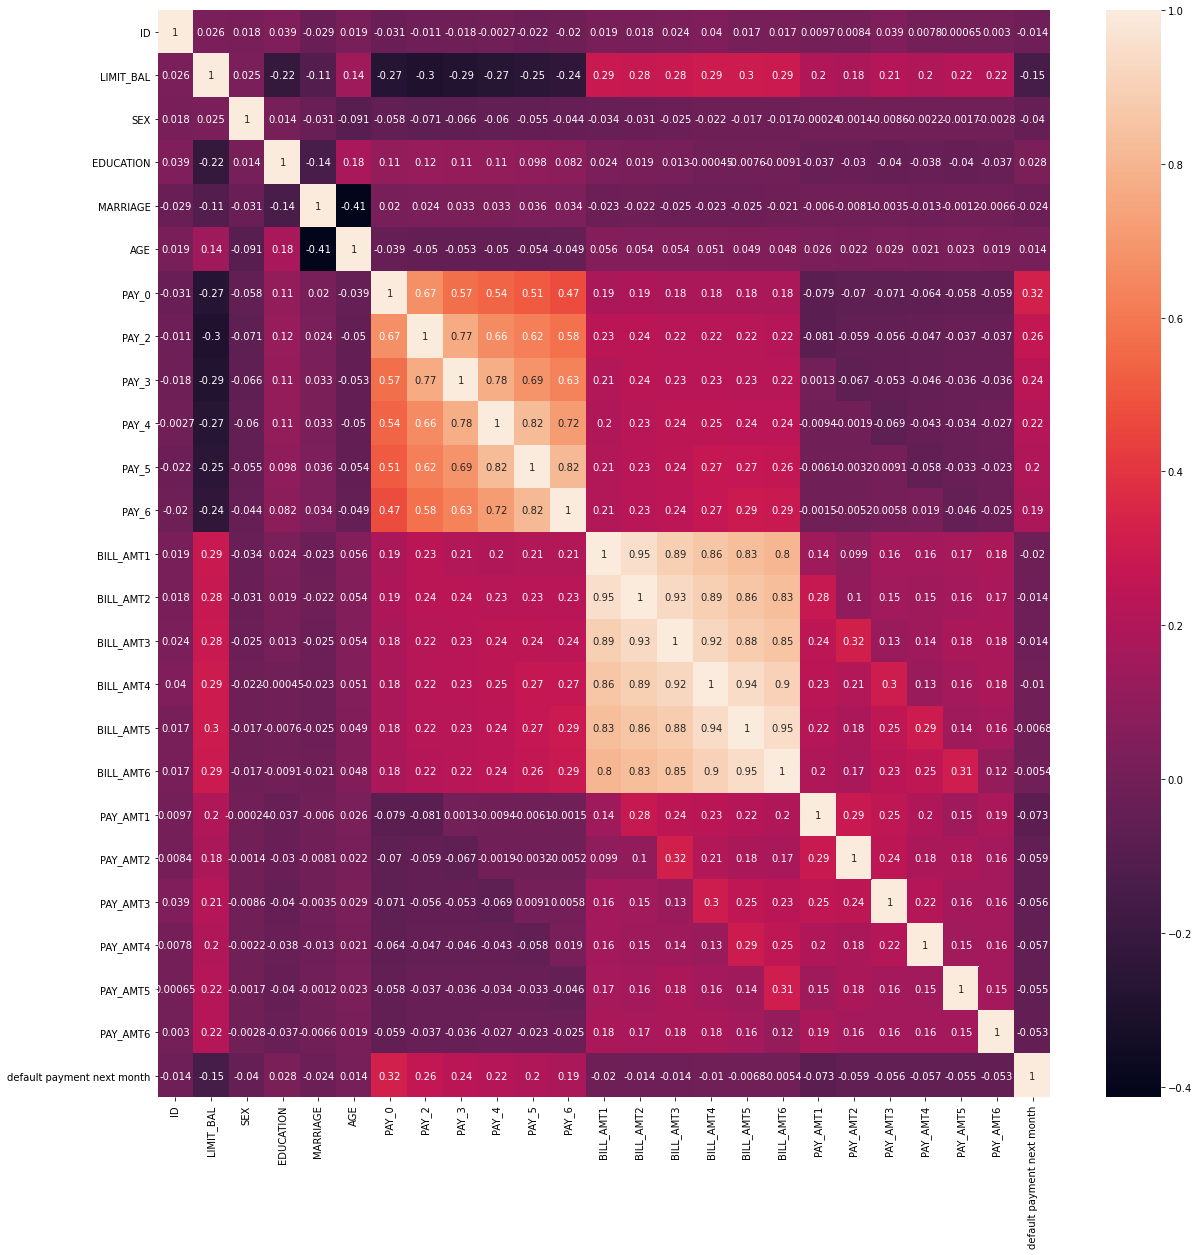

In [14]:
# Creating a Correlation Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot =True)
  

In [15]:
X=df.drop('default payment next month', axis=1)
Y=df['default payment next month']

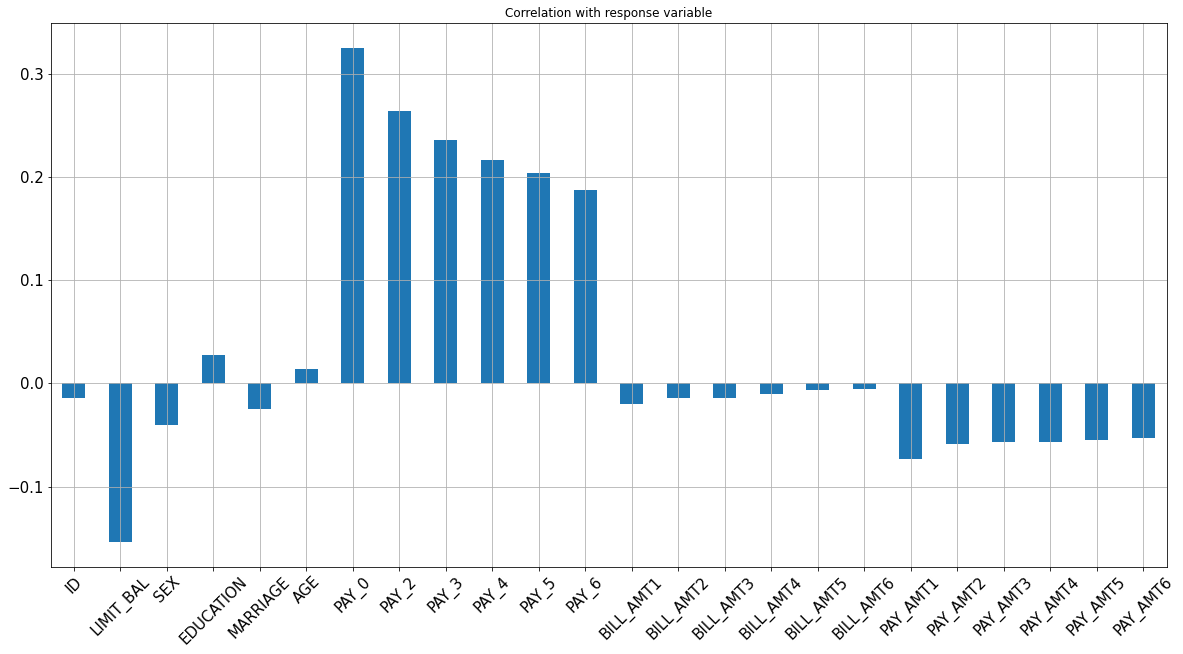

In [16]:
X.corrwith(Y).plot.bar(figsize=(20,10), title="Correlation with response variable", fontsize=15, rot=45, grid=True)

In [17]:
X_new=X.drop(['ID','MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ],axis=1)

In [18]:
X_new

,LIMIT_BAL,SEX,EDUCATION,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,2,2,-1,-1,-2,-2,0,689,0,0,0,0
1,120000,2,2,-1,2,0,0,0,2,0,1000,1000,1000,0,2000
2,90000,2,2,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000
3,50000,2,2,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000
4,50000,1,2,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,0,0,0,0,0,0,8500,20000,5003,3047,5000,1000
29996,150000,1,3,-1,-1,-1,-1,0,0,1837,3526,8998,129,0,0
29997,30000,1,2,4,3,2,-1,0,0,0,0,22000,4200,2000,3100
29998,80000,1,3,1,-1,0,0,0,-1,85900,3409,1178,1926,52964,1804


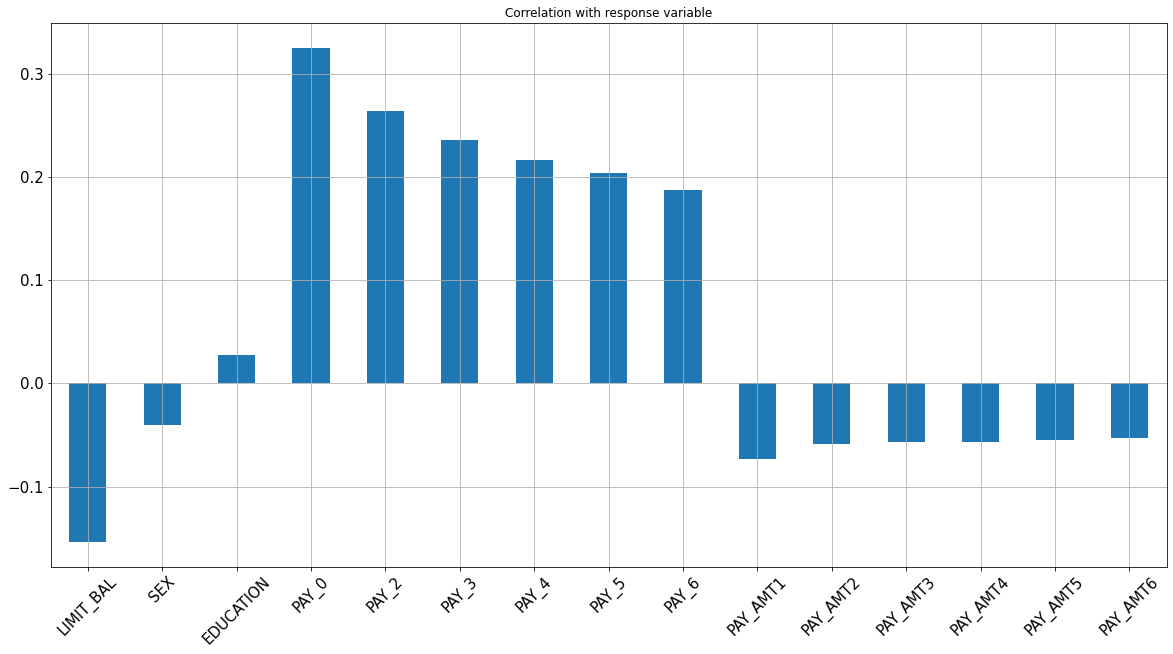

In [19]:
X_new.corrwith(Y).plot.bar(figsize=(20,10), title="Correlation with response variable", fontsize=15, rot=45, grid=True)

In [20]:
 # Feature Scaling



In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train=sc.fit_transform(X)
X_new=sc.fit_transform(X_new)


In [22]:
Y=np.array(Y)

In [23]:
X.shape,Y.shape

((30000, 24), (30000,))

In [24]:
x= X_new[:1000,]
y= Y[:1000,] 

In [25]:
from sklearn import model_selection
x_train, x_test, y_train, y_test =model_selection.train_test_split(X,Y, test_size= 0.2)

# Model Building


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

### 1:] Decision Tree Model


In [27]:
 clf_tree=DecisionTreeClassifier()

In [28]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=clf_tree.predict(x_test)

#### Confusion Matrix

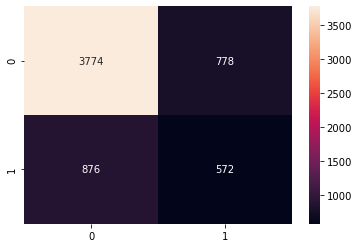

In [30]:
cm=confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True, fmt='d')

In [31]:
ac=accuracy_score(y_pred, y_test)
print ("The acuuracy is",ac*100,'%')

The acuuracy is 72.43333333333334 %


### 2:] Decision Tree with GridSearch

In [32]:
parameters={'min_samples_split':range(10,500,20), 'max_depth': range(1,20,2)}

In [43]:
clf_tree=DecisionTreeClassifier()

In [45]:
clf=GridSearchCV(clf_tree,parameters)
#clf.fit(x_train,y_train)

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True, fmt='d')

### 3:] Random Forest Classifier Method

In [36]:
ran=RandomForestClassifier()

In [37]:
ran.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_predran=ran.predict(x_test)

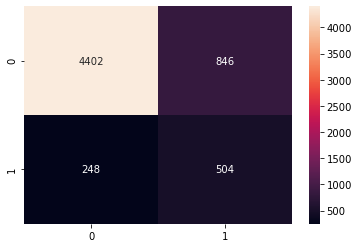

In [41]:
cm=confusion_matrix(y_predran,y_test)
sns.heatmap(cm,annot=True, fmt='d')

In [42]:
ac=accuracy_score(y_predran, y_test)
print ("The acuuracy is",ac*100,'%')

The acuuracy is 81.76666666666667 %
